In [1]:
# %matplotlib Qt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from modules import Perceptron

In [3]:
data = pd.read_csv('data/Surgical-deepnet.csv')
data

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1


In [4]:
data.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

In [5]:
X = data.drop('complication', axis=1).copy().values
Y = data[['complication']].copy().values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)


In [7]:
learning_rate_w = 0.00001
learning_rate_b = 0.0001
Epoch = 0
stop_condition = False
loss_threshold = 0.01  # Threshold for stopping condition

In [8]:
model = Perceptron(
                input_size=X_train.shape[1], 
                lr_w=learning_rate_w, 
                lr_b=learning_rate_b, 
                epoch=Epoch, 
                loss_threshold=loss_threshold, 
                function='sigmoid'
            )
model.fit(X_train, Y_train, X_test, Y_test)

📚Epoch 1, Train Loss: 0.3467733221137248, Train Accuracy: 0.646822685343355
📄Epoch 1, Test Loss: 0.3555707515487955, Test Accuracy: 0.6484455073454048
📚Epoch 2, Train Loss: 0.3383034260314086, Train Accuracy: 0.6727024256918347
📄Epoch 2, Test Loss: 0.3468704820577885, Test Accuracy: 0.6730440724291084
📚Epoch 3, Train Loss: 0.3330920466026671, Train Accuracy: 0.6904680560300649
📄Epoch 3, Test Loss: 0.34138915890965094, Test Accuracy: 0.6938845234028015
📚Epoch 4, Train Loss: 0.32743025098873674, Train Accuracy: 0.7043901605739665
📄Epoch 4, Test Loss: 0.3351525784821096, Test Accuracy: 0.7031089853091903
📚Epoch 5, Train Loss: 0.32057117870284696, Train Accuracy: 0.7154082678510421
📄Epoch 5, Test Loss: 0.3282788973362973, Test Accuracy: 0.7133583874274001
📚Epoch 6, Train Loss: 0.3131968358004422, Train Accuracy: 0.7230953194396994
📄Epoch 6, Test Loss: 0.3209218086665206, Test Accuracy: 0.7191663819610523
📚Epoch 7, Train Loss: 0.3061018949873467, Train Accuracy: 0.7289887256576699
📄Epoch 7,

In [9]:
epochs = range(1, model.Epoch + 1)

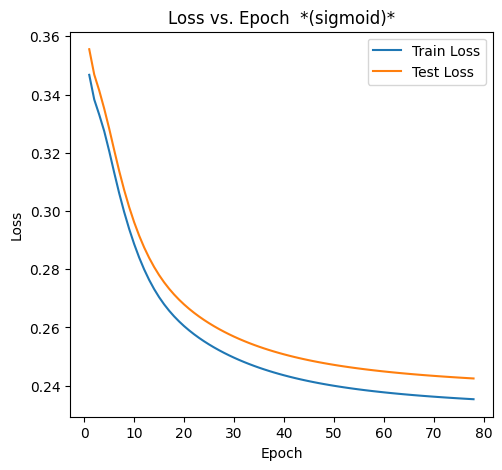

In [10]:
# Loss chart
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, model.losses_train, label='Train Loss')
plt.plot(epochs, model.losses_test, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch  *(sigmoid)*')
plt.legend()

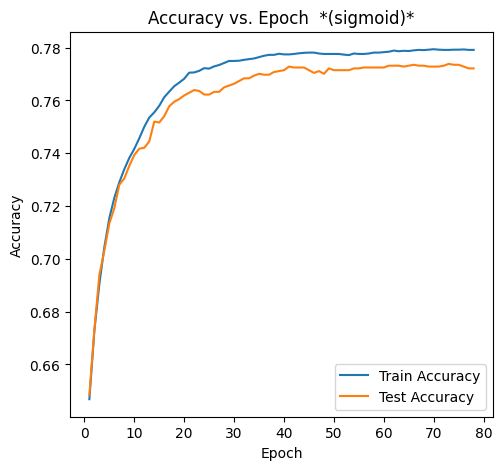

In [11]:
# Accuracy chart
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, model.accuracies_train, label='Train Accuracy')
plt.plot(epochs, model.accuracies_test, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch  *(sigmoid)*')
plt.legend()

plt.show()

In [12]:
model.evaluate(X_test, Y_test)

(0.24248651871819354, 0.7721216262384695)

In [13]:
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred > 0.5, 1, 0)

In [14]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[2020,  141],
       [ 526,  240]], dtype=int64)

In [15]:
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_percent

array([[0.93475243, 0.06524757],
       [0.68668407, 0.31331593]])

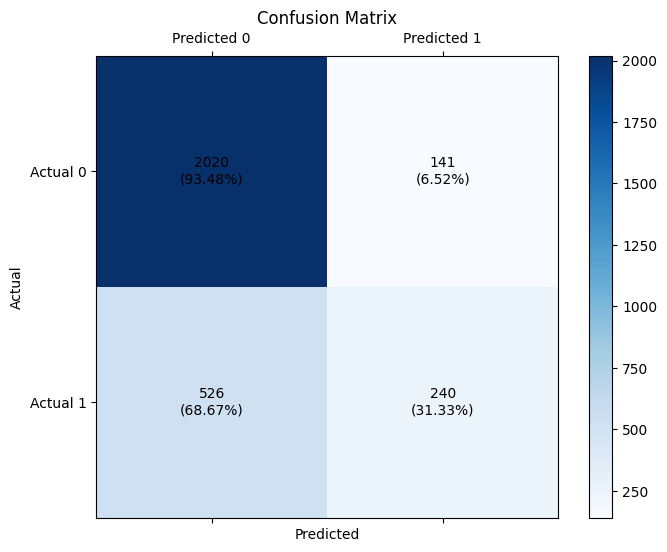

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

cax = ax.matshow(cm, cmap='Blues')
plt.colorbar(cax)

ax.set_xticks(np.arange(len(cm)))
ax.set_yticks(np.arange(len(cm)))

ax.set_xticklabels(['Predicted 0', 'Predicted 1'])
ax.set_yticklabels(['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')

for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}\n({cm_percent[i, j]*100:.2f}%)', ha='center', va='center', color='black')

plt.title('Confusion Matrix')
plt.show()